Hub Scores:  {'d0': 0.05973413517823409, 'd2': 0.21656623816336049, 'd1': 0.07209521380896725, 'd3': 0.2022701692263151, 'd4': 0.07704056376923576, 'd6': 0.27931073299555087, 'd5': 0.09298294685833647}
Authority Scores:  {'d0': 0.09180027534810924, 'd2': 0.14768142579252108, 'd1': 0.030560444393699225, 'd3': 0.2959376321276558, 'd4': 0.20413735677954656, 'd6': 0.19046831878209056, 'd5': 0.03941454677637756}


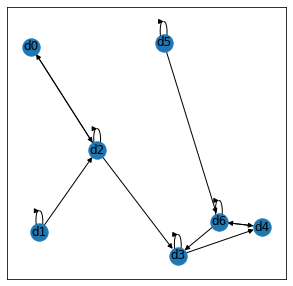

In [51]:
###2.
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

G.add_edges_from([('d0', 'd2'), ('d1', 'd1'), ('d1', 'd2'), ('d2', 'd0'),
				('d2', 'd2'), ('d2', 'd3'), ('d2', 'd3'), ('d3', 'd3'),
				('d3', 'd4'), ('d4', 'd6'), ('d5', 'd6'), ('d5', 'd5'),
				('d6', 'd4'), ('d6', 'd6'),('d6','d3'),('d6', 'd3')])

plt.figure(figsize =(5, 5))
nx.draw_networkx(G, with_labels = True)

hubs, authorities = nx.hits(G, max_iter = 25, normalized = True)


print("Hub Scores: ", hubs)
print("Authority Scores: ", authorities)



Hub Scores:  {'d0': 0.05973413517823404, 'd2': 0.21656623816336046, 'd1': 0.07209521380896718, 'd3': 0.20227016922631508, 'd4': 0.07704056376923579, 'd6': 0.27931073299555087, 'd5': 0.09298294685833648}
Authority Scores:  {'d0': 0.09180027534810922, 'd2': 0.14768142579252097, 'd1': 0.030560444393699194, 'd3': 0.29593763212765584, 'd4': 0.20413735677954659, 'd6': 0.19046831878209064, 'd5': 0.03941454677637754}


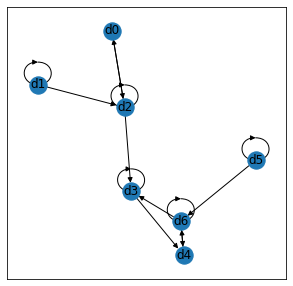

In [52]:
###1.
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

G.add_edges_from([('d0', 'd2'), ('d1', 'd1'), ('d1', 'd2'), ('d2', 'd0'),
				('d2', 'd3'),('d2', 'd2'), ('d3', 'd3'), ('d3', 'd4'),
				('d4', 'd6'), ('d5', 'd5'), ('d5', 'd6'), ('d6', 'd4'),
				('d6', 'd3'),('d6','d6')])

plt.figure(figsize =(5, 5))
nx.draw_networkx(G, with_labels = True)

hubs, authorities = nx.hits(G, max_iter = 25, normalized = True)


print("Hub Scores: ", hubs)
print("Authority Scores: ", authorities)


Hub Scores:  {'d0': -1.0324001601670907e-16, 'd2': 0.3568958678922095, 'd1': -1.0324001601670907e-16, 'd3': 0.1980622641951618, 'd4': 2.5810004004177267e-17, 'd6': 0.4450418679126289, 'd5': 2.5810004004177267e-17}
Authority Scores:  {'d0': 0.19806226419516176, 'd2': -1.8603208070560402e-16, 'd1': 0.0, 'd3': 0.44504186791262895, 'd4': 0.35689586789220956, 'd6': 4.6508020176401004e-17, 'd5': 0.0}


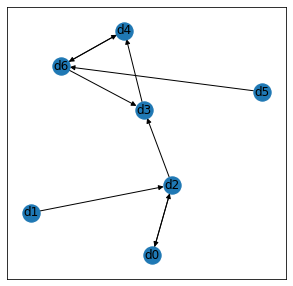

In [53]:
###2.
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

G.add_edges_from([('d0', 'd2'),  ('d1', 'd2'), ('d2', 'd0'),
				('d2', 'd3'),  ('d3', 'd4'),
				('d4', 'd6'), ('d5', 'd6'), ('d6', 'd4'),
				('d6', 'd3')])

plt.figure(figsize =(5, 5))
nx.draw_networkx(G, with_labels = True)

hubs, authorities = nx.hits(G, max_iter = 25, normalized = True)


print("Hub Scores: ", hubs)
print("Authority Scores: ", authorities)


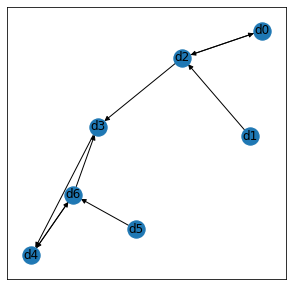

In [54]:
import networkx as nx
import numpy as np
from numpy import linalg as LA

###2.
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

G.add_edges_from([('d0', 'd2'),  ('d1', 'd2'), ('d2', 'd0'),
				('d2', 'd3'),  ('d3', 'd4'),
				('d4', 'd6'), ('d5', 'd6'), ('d6', 'd4'),
				('d6', 'd3')])

plt.figure(figsize =(5, 5))
nx.draw_networkx(G, with_labels = True)


def hits(graph, iter_count = 25):
    nodes = graph.nodes()
    nodes_count = len(nodes)
    matrix = nx.to_numpy_matrix(graph, nodelist=nodes)
    
    hubs_score = np.ones(nodes_count)
    auth_score = np.ones(nodes_count)
    H = matrix * matrix.T
    A = matrix.T * matrix
    
    for i in range(iter_count):
       
        hubs_score = hubs_score * H 
        auth_score = auth_score * A 
        hubs_score = hubs_score / LA.norm(hubs_score)
        auth_score = auth_score / LA.norm(auth_score)
        
        
    hubs_score = np.array(hubs_score).reshape(-1,)
    auth_score = np.array(auth_score).reshape(-1,)
    
    hubs = dict(zip(nodes, hubs_score))
    authorities = dict(zip(nodes, auth_score))
    return hubs, authorities

In [59]:

def gethubs(graph):
    hubs = hits(graph)[0]
    return hubs.items()

def getauthorities(graph):
    auth = hits(graph)[1]
    return auth.items()

In [62]:
A = gethubs(G)
print("hub score\n")
print(A)

A = getauthorities(G)

print("authority score\n",A)

hub score

dict_items([('d0', 3.30908762275882e-06), ('d2', 0.5910090476718753), ('d1', 3.30908762275882e-06), ('d3', 0.3279852782571184), ('d4', 3.30908762275882e-06), ('d6', 0.7369762294489447), ('d5', 3.30908762275882e-06)])
authority score
 dict_items([('d0', 0.3279852782607097), ('d2', 3.3090876227950535e-06), ('d1', 0.0), ('d3', 0.7369762294570145), ('d4', 0.5910090476783469), ('d6', 3.3090876227950535e-06), ('d5', 0.0)])


hub score

dict_items([('d0', 0.13733887678373746), ('d2', 0.49791997441298586), ('d1', 0.16575925456602145), ('d3', 0.46504928093541364), ('d4', 0.17712711716437166), ('d6', 0.6421763980997853), ('d5', 0.2137807894085654)])
authority score
 dict_items([('d0', 0.20617455486683953), ('d2', 0.3316791784365786), ('d1', 0.06863637398763214), ('d3', 0.6646445301352053), ('d4', 0.45846997526836575), ('d6', 0.42776992980734563), ('d5', 0.08852028679529564)])


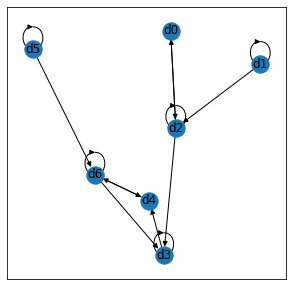

In [63]:
###1.
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

G = nx.DiGraph()

G.add_edges_from([('d0', 'd2'), ('d1', 'd1'), ('d1', 'd2'), ('d2', 'd0'),
				('d2', 'd3'),('d2', 'd2'), ('d3', 'd3'), ('d3', 'd4'),
				('d4', 'd6'), ('d5', 'd5'), ('d5', 'd6'), ('d6', 'd4'),
				('d6', 'd3'),('d6','d6')])

plt.figure(figsize =(5, 5))
nx.draw_networkx(G, with_labels = True)
def hits(graph, iter_count = 25):
    nodes = graph.nodes()
    nodes_count = len(nodes)
    matrix = nx.to_numpy_matrix(graph, nodelist=nodes)
    
    hubs_score = np.ones(nodes_count)
    auth_score = np.ones(nodes_count)
    H = matrix * matrix.T
    A = matrix.T * matrix
    
    for i in range(iter_count):
       
        hubs_score = hubs_score * H 
        auth_score = auth_score * A 
        hubs_score = hubs_score / LA.norm(hubs_score)
        auth_score = auth_score / LA.norm(auth_score)
        
        
    hubs_score = np.array(hubs_score).reshape(-1,)
    auth_score = np.array(auth_score).reshape(-1,)
    
    hubs = dict(zip(nodes, hubs_score))
    authorities = dict(zip(nodes, auth_score))
    return hubs, authorities
def gethubs(graph):
    hubs = hits(graph)[0]
    return hubs.items()

def getauthorities(graph):
    auth = hits(graph)[1]
    return auth.items()
A = gethubs(G)
print("hub score\n")
print(A)

A = getauthorities(G)

print("authority score\n",A)

hub score

dict_items([('d0', 0.13733887678373746), ('d2', 0.49791997441298586), ('d1', 0.16575925456602145), ('d3', 0.46504928093541364), ('d4', 0.17712711716437166), ('d6', 0.6421763980997853), ('d5', 0.2137807894085654)])
authority score
 dict_items([('d0', 0.20617455486683953), ('d2', 0.3316791784365786), ('d1', 0.06863637398763214), ('d3', 0.6646445301352053), ('d4', 0.45846997526836575), ('d6', 0.42776992980734563), ('d5', 0.08852028679529564)])


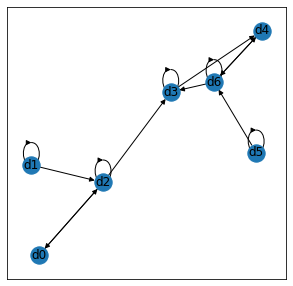

In [64]:
###1.
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

G = nx.DiGraph()

G.add_edges_from([('d0', 'd2'), ('d1', 'd1'), ('d1', 'd2'), ('d2', 'd0'),
				('d2', 'd2'), ('d2', 'd3'), ('d2', 'd3'), ('d3', 'd3'),
				('d3', 'd4'), ('d4', 'd6'), ('d5', 'd6'), ('d5', 'd5'),
				('d6', 'd4'), ('d6', 'd6'),('d6','d3'),('d6', 'd3')])

plt.figure(figsize =(5, 5))
nx.draw_networkx(G, with_labels = True)
def hits(graph, iter_count = 25):
    nodes = graph.nodes()
    nodes_count = len(nodes)
    matrix = nx.to_numpy_matrix(graph, nodelist=nodes)
    
    hubs_score = np.ones(nodes_count)
    auth_score = np.ones(nodes_count)
    H = matrix * matrix.T
    A = matrix.T * matrix
    
    for i in range(iter_count):
       
        hubs_score = hubs_score * H 
        auth_score = auth_score * A 
        hubs_score = hubs_score / LA.norm(hubs_score)
        auth_score = auth_score / LA.norm(auth_score)
        
        
    hubs_score = np.array(hubs_score).reshape(-1,)
    auth_score = np.array(auth_score).reshape(-1,)
    
    hubs = dict(zip(nodes, hubs_score))
    authorities = dict(zip(nodes, auth_score))
    return hubs, authorities
def gethubs(graph):
    hubs = hits(graph)[0]
    return hubs.items()

def getauthorities(graph):
    auth = hits(graph)[1]
    return auth.items()
A = gethubs(G)
print("hub score\n")
print(A)

A = getauthorities(G)

print("authority score\n",A)